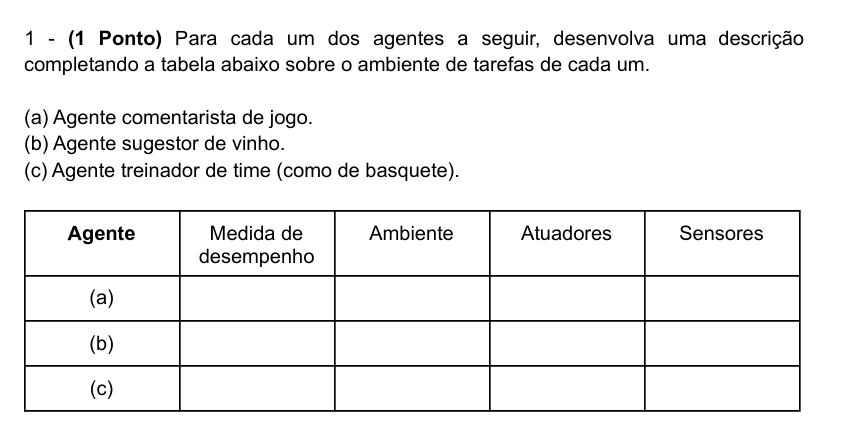





In [ ]:
import pandas as pd

data = {
    "Agentes":["Comentarista de jogo","Sugestor de vinho","Treinador de time"],
    "Medida de desempenho":["Adequação da locução aos acontecimentos do jogo","Satisfação dos clientes ao vinho escolhido","Número de vitórias do time"],
    "Ambiente":["Transmissão de um jogo","Pedidos de recomendação de vinho","Necessidades individuais e coletivas de um time"],
    "Atuadores":["Saída via sintetização de voz ou por digitação","Display em tela","Métodos e dinâmicas de treinamento"],
    "Sensores":["Tela de transmissão do jogo","Formulário de preferênciass dos clientes","Sensores de medição de características fisiológicas como batimentos cardíacos, pressão sanguínea, etc."]
}

df = pd.DataFrame(data)
df

,Agentes,Medida de desempenho,Ambiente,Atuadores,Sensores
0,Comentarista de jogo,Adequação da locução aos acontecimentos do jogo,Transmissão de um jogo,Saída via sintetização de voz ou por digitação,Tela de transmissão do jogo
1,Sugestor de vinho,Satisfação dos clientes ao vinho escolhido,Pedidos de recomendação de vinho,Display em tela,Formulário de preferênciass dos clientes
2,Treinador de time,Número de vitórias do time,Necessidades individuais e coletivas de um time,Métodos e dinâmicas de treinamento,Sensores de medição de características fisioló...


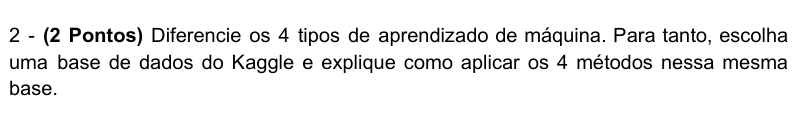

No aprendizado supervisionado, treinaremos nossa IA com dados cuja as classes de entrada e saída sobre corpos celestes são devidamente rotulados e previamente conhecidos, e então, a nossa máquina devidamente treinada, receberá dados de teste, no qual não possuem uma classe categórica do nome do respectivo corpo celeste rotulado, e prover esta classe aos dados de teste com base nos dados de treinamento.

No aprendizado não-supervisionado, treinaremos a máquina com dados que não estarão rotulados, e a mesma analisará os dados, encontrando padrões e correlações entre eles, e formando clusters, grupos de dados formados e delimitados por um padrão distinto entre esses dados, sendo cada cluster representando um rótulo em específico para todos os vetores de dados pertencentes a um número n de cluster, no qual, cada um cluster representará um tipo de corpo celeste, assim, a máquina irá julgar se dados de teste serão de uma determinada classe com base nos padrões de dados obtidos nos dados de treinamento.

Digamos que, no aprendizado semi-supervisionado, teremos um grande dataset que contem uma pequena quantidade e dados devidamente rotulados e uma grande quantidade de dados não rotulados. Para utilizar esses dados, nós devemos aplicar métodos de clusterização a todo o dataset de treinamento para podermos rotular nossos dados não rotulados, e em seguida, aplicar um método de aprendizado supervisionado ao nosso dataset.

No aprendizado por reforço, nossa máquina explorará os valores da tabela de treinamento, e com essa informação ele fornecerá os rótulos acerca de qual corpo celeste cada entrada de valores da tabela de teste pertence, e ganhará uma nota para o quão aproximados os valores para qual foram fornecidos rótulos estão em relação aos valores no dataset de treinamento, então itera-se esse processo até o evento em que se há uma nota satisfatória.

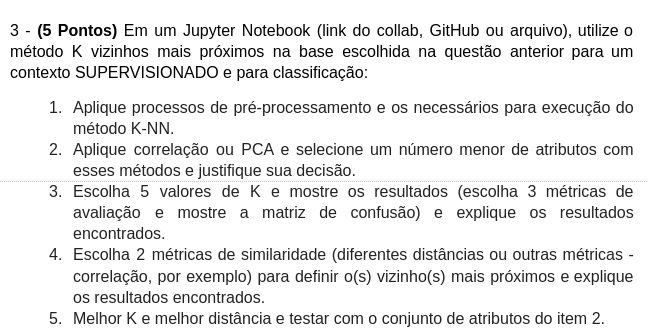

Link de compartilhamento do csv do dataset. Recomendado montar o drive pq, sem motivo conhecido, o arquivo não é upado direito: https://drive.google.com/file/d/1MnJcNNeVo1cRXWPsMyurB30K6GYS5BDT/view?usp=sharing

Caso contrário algum erro, baixe a API token do kaggle, faça o upload do kaggle.json no diretório do notebook e rode os comandos:

In [13]:
!rm -rf ~/.kaggle

In [14]:
!mkdir ~/.kaggle

In [15]:
!cp kaggle.json ~/.kaggle/

In [16]:
!chmod 600 ~/.kaggle/kaggle.json

In [21]:
!kaggle datasets download fedesoriano/stellar-classification-dataset-sdss17 -f star_classification.csv

 87% 6.00M/6.89M [00:00<00:00, 62.7MB/s]
100% 6.89M/6.89M [00:00<00:00, 69.2MB/s]


In [22]:
!unzip star_classification.csv

Archive:  star_classification.csv.zip
  inflating: star_classification.csv  


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [24]:
# lendo o CSV para usar o dataset

df = pd.read_csv("/content/star_classification.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [25]:
#eliminação de colunas irrelevantes/nulas
df.drop(columns=['obj_ID','run_ID',"rerun_ID","cam_col","field_ID","plate","spec_obj_ID","MJD","fiber_ID"], inplace=True)
df

,alpha,delta,u,g,r,i,z,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123
...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,GALAXY,0.000000
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,GALAXY,0.404895
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,GALAXY,0.143366
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,GALAXY,0.455040


In [26]:
#transformação dos dados categóricos da coluna class em numéricos com OneHotEncoding: GALAXY = 0
# QS0 = 1, STAR = 2

le = preprocessing.LabelEncoder()

df["class"] = le.fit_transform(df["class"])
y = df.pop("class")

In [27]:
#matriz de correlação, dada a baixa variancia dos dados, não será feito o PCA

corr = df.corr()
corr.style.background_gradient("coolwarm")

,alpha,delta,u,g,r,i,z,redshift
alpha,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,0.001667
delta,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,0.031638
u,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.014309
g,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.022954
r,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.433241
i,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.492383
z,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.030380
redshift,0.001667,0.031638,0.014309,0.022954,0.433241,0.492383,0.030380,1.000000


In [28]:
#Normalização de dados, passso muito importante para aplicarmos o K-NN posteriormente
#Muito importante, também, dividir o dataset entre treinamento e teste e depois, 
#normalizar os dois separadamente

X_train,X_test,y_train,y_test = train_test_split(df,y, train_size=0.7, random_state=55)

rs = RobustScaler()
robust_train = rs.fit_transform(X_train)
robust_test = rs.fit_transform(X_test)

In [ ]:
#Treino e apresentação da performance do aprendizado com a matriz de confusão,
#além da medida do coeficiente de Matthews, a acurácia do modelo e a precisão
#total do modelo para os primeiros 5 valores de K.  

for i in range(1,6):
  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(robust_train, y_train)
  y_pred = clf.predict(robust_test)

  print(f"KNN: N = {i}")
  confusion = metrics.confusion_matrix(y_test,y_pred)
  disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion)
  disp.plot()
  plt.show()
  
  #Nossos valores de K mostraram uma sensibilidade, ou seja, uma 
  #proporção de acerto de verdadeiros positivos de aproximadamente 0.94
  rec = metrics.recall_score(y_test, y_pred, average="micro")
  print(f"Sensibilidade total do modelo: {rec:.2f}")

  #Nossos valores de K mostraram uma acurácia, ou seja, uma 
  #proporção de acerto de verdadeiros positivos e negativos de aproximadamente
  #0.94
  acc = metrics.accuracy_score(y_test,y_pred)
  print(f"Acurácia do modelo: {acc:.2f}")

  #Nossos valores de K geraram um coeficiente de Matthews, que mede a qualidade  
  #preditiva de um modelo, apresentando valores em torno de 0.90
  matt = metrics.matthews_corrcoef(y_test,y_pred)
  print(f"Coeficiente de Matthews do modelo: {matt:.2f}\n")

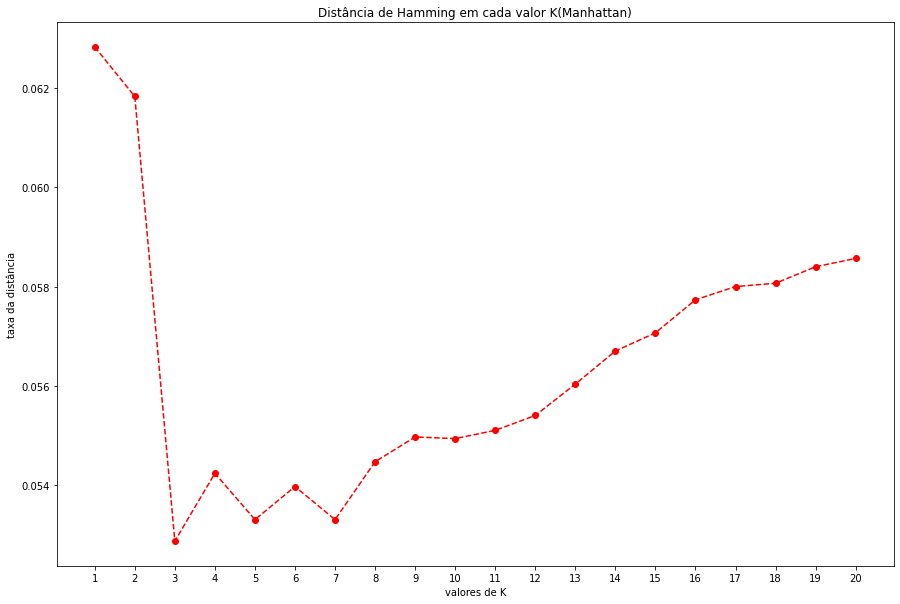

K óptimo: 3, com uma distância de Hamming de 0.05


In [44]:
#Para calcular o melhor K para o modelo, faremos 30 predições e treinaremos o
#modelo com a distância de Manhattan(p=1) e medir a distância de Hamming de cada uma
#das 20 iterações, e com elas plotaremos um gráfico de variação dessa distância
#para cada valor K, então acharemos o melhor valor, ou seja aquele K que possui
#a menor distância de Hamming entre as predições. 

predictions = range(1,21)
loss = []

for i in predictions:
  clf = KNeighborsClassifier(n_neighbors=i, p=1)
  clf.fit(robust_train, y_train)
  y_pred = clf.predict(robust_test)
  loss.append(metrics.hamming_loss(y_test,y_pred))

plt.figure(figsize=(15,10))
plt.plot(predictions,loss,marker = 'o',linestyle='dashed',color="red")
plt.title("Distância de Hamming em cada valor K(Manhattan)")
plt.xlabel('valores de K')
plt.ylabel("taxa da distância")
plt.xticks(predictions)
plt.show()

print(f"K óptimo: {loss.index(min(loss))+1}, com uma distância de Hamming de {min(loss):.2f}")

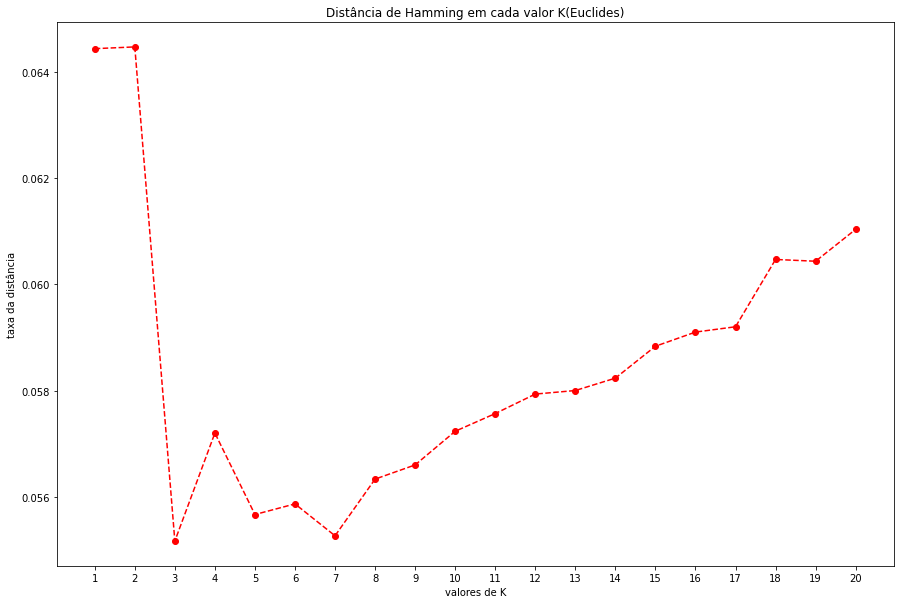

K óptimo: 3, com uma distância de Hamming de 0.06


In [45]:
#Mesmo procedimento utilizando distância de Euclides(p=2). Constata-se que o
#melhor K para o dataset é 3, apresentando uma distância de erro mínima.
#Também se observa as diferencas da distancia de Hamming das duas normas

loss = []

for i in predictions:
  clf = KNeighborsClassifier(n_neighbors=i, p=2)
  clf.fit(robust_train, y_train)
  y_pred = clf.predict(robust_test)
  loss.append(metrics.hamming_loss(y_test,y_pred))

plt.figure(figsize=(15,10))
plt.plot(predictions,loss,marker = 'o',linestyle='dashed',color="red")
plt.title("Distância de Hamming em cada valor K(Euclides)")
plt.xlabel('valores de K')
plt.ylabel("taxa da distância")
plt.xticks(predictions)
plt.show()

print(f"K óptimo: {loss.index(min(loss))+1}, com uma distância de Hamming de {min(loss):.2f}")

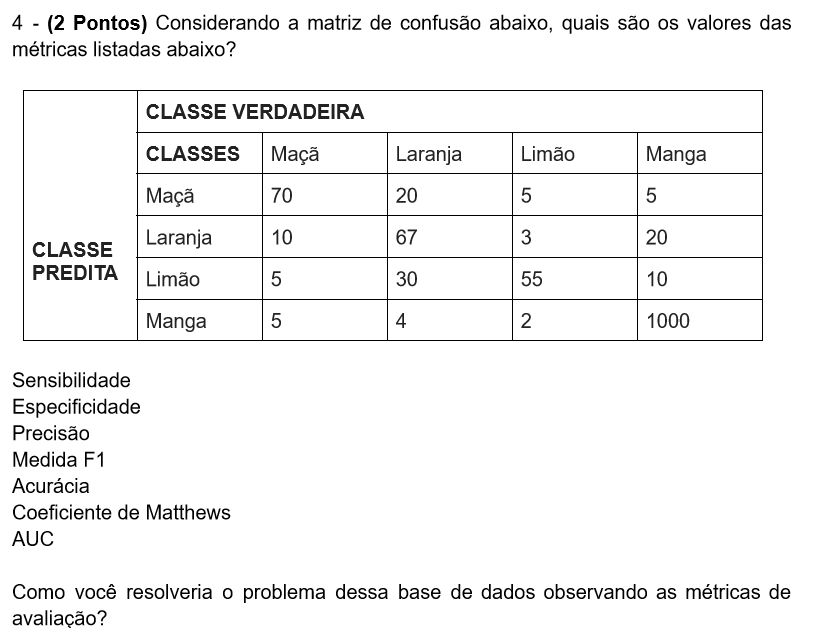

In [ ]:
#transpor os números para um DataFrame
c = {'Maçã':[70,20,5,5],"Laranja":[10,67,3,20],"Limão":[5,30,55,10],"Manga":[5,4,2,1000]}
conf = pd.DataFrame(data=c, index=["Maçã","Laranja","Limão","Manga"])
conf

,Maçã,Laranja,Limão,Manga
Maçã,70,10,5,5
Laranja,20,67,30,4
Limão,5,3,55,2
Manga,5,20,10,1000


In [ ]:
#calcular VP, VN, FP, e FN

VP = np.diag(conf)
FP = conf.sum(axis=0) - VP
FN = conf.sum(axis=1) - VP
VN = conf.values.sum() - (VP + FP + FN) 

In [ ]:
#Calcular as métricas:

#Em um modelo preditivo de identificação de frutas, é muito importante que o
#modelo seja menos tolerante a falsos positvos na sua identificação. Nisso é
#necessário que o processo de treinamento e predição seja ajustado a obter uma
#maior precisão, ou seja fazer com que a máquina obtenha menos falsos positivos

#sensibilidade
sense = VP/(VP+FN)
print(f"Sensibilidade:\n {sense.mean()}\n")

#Especificidade
espec = VN/(VN+FP)
print(f"Especificidade:\n {espec.mean()}\n")

#Precisão
prec = VP/(VP+FP)
print(f"Precisão:\n {prec.mean()}\n")

#F1-score
f1 = 2*(prec*sense/(prec+sense))
print(f"F1-score:\n {f1.mean()}\n")

#accurácia
acc = (VP+VN)/(VP+VN+FP+FN)
print(f"Acurácia:\n {acc.mean()}\n")

#Coef. de Matthews
matt = (VP*VN - FP*FN) / np.sqrt((VP + FP)*(VP + FN)*(VN + FP)*(VN + FN))
print(f"Coef. de Matthews:\n {matt.mean()}\n")

#AUC
np_sense = np.array([0, sense, 1], dtype="object")
fall_out = FP/(FP+VN)
np_fall_out = np.array([0, fall_out, 1], dtype='object')
auc_coef = np.trapz(np_sense, np_fall_out)

print(f"AUC:\n {auc_coef.mean()}\n")

Sensibilidade:
 0.7859585517688285

Especificidade:
 0.9679320601764494

Precisão:
 0.7272799208704254

F1-score:
 0.7468401800270371

Acurácia:
 0.9546147978642258

Coef. de Matthews:
 0.7131197999274905

AUC:
 0.8769453059726389

